### Task 1.2: Create an agent

Make your first agent using Amazon Nova Lite.

In [ ]:
from IPython.display import Image
Image(filename='images/agent.png', width='70%')

The agentic loop represents an AI agent's decision-making cycle, where it receives a prompt, processes it through a model, selects and uses appropriate tools, and returns results. This continuous loop allows the agent to interact with prompts and tools while leveraging the model's capabilities to produce meaningful responses.

By default, an **Agent** object uses the Amazon Bedrock model provider with the Anthropic Claude 4 model. Other model providers including Anthropic, OpenAI, and LiteLLM can be used with Strands Agents. In this lab you use the Amazon Bedrock model provider with specific models in specific regions, so you must use the **BedrockModel** class with a boto3 session.

1. To create a model, run the following cell:

In [3]:
import boto3
from strands.models import BedrockModel

use1_session = boto3.Session(profile_name = "AdministratorAccess-038462773691-us-east-1")
usw2_session = boto3.Session(profile_name = "AdministratorAccess-038462773691-us-west-2")

nova_lite = BedrockModel(model_id="amazon.nova-lite-v1:0", boto_session=use1_session)

2. To create a Strands agent, run the following cell:

In [4]:
from strands import Agent

# Create an agent
basic_agent = Agent(
    model = nova_lite
)

3. To invoke an agent, instructing it to write a file to your directory, run the following cell:

In [5]:
# Invoke an agent
response = basic_agent("Write a file called flights.csv to my file system")
print(response)

To create a file called `flights.csv` and write some data into it, you can use Python. Below is a simple example of how you can do this. This script will create a CSV file with some sample flight data.

Here's the Python code to create the `flights.csv` file:

```python
import csv

# Sample flight data
flights = [
    ["Flight Number", "Airline", "Departure Airport", "Arrival Airport", "Departure Time", "Arrival Time"],
    ["AA101", "American Airlines", "JFK", "LAX", "2023-10-01 08:00", "2023-10-01 11:00"],
    ["UA202", "United Airlines", "ORD", "SFO", "2023-10-01 09:00", "2023-10-01 12:00"],
    ["DL303", "Delta Air Lines", "ATL", "DEN", "2023-10-01 10:00", "2023-10-01 13:00"],
    ["WN404", "Southwest Airlines", "LAS", "PHX", "2023-10-01 11:00", "2023-10-01 14:00"]
]

# File path
file_path = 'flights.csv'

# Writing to the CSV file
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(flights)

print(f"File '{file_path}' has been cre

The agent you just used has no tools, leverages no MCPs, and does not interface with any other agents. 

It is effectively just the base Amazon Nova Lite model, not taking advantage of the agentic optimizations offered by Strands Agents. It gives you instructions on how to perform an action, rather than taking the action itself.

### Task 1.3: Create a coding assistant by adding tools

Add read, write, and file execution using Strands Agents built-in tools.

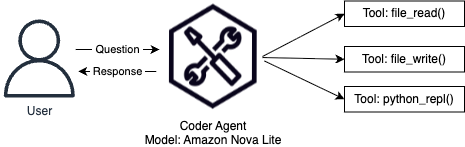

In [6]:
from IPython.display import Image
Image(filename='images/coder.png')

The true strength of Strands Agents is unlocked by using tools. Tools allow agents to interact with external systems, access data, and manipulate environments.

Strands offers built-in tools to get started with extending your agent past simple text generation.

4. To add the **file_read** built-in tool and a **system_prompt**, creating a more-complex agent that can help you code, run the following cell:

In [7]:
from strands_tools import file_read

agent_with_tool = Agent(
    model = nova_lite,
    system_prompt = """You are a helpful assistant.
    You can read from the local file system to answer questions
    """,
    tools = [file_read]
)

5. To invoke the file reading agent, run the following cell:

In [8]:
# Invoke an agent
response = agent_with_tool("""I need to create a flights csv object using the schema provided in ./project/flights-schema.csv.
What fields are required?""")
print(response)

<thinking>To create a flights CSV object using the schema provided in `./project/flights-schema.csv`, I need to first read the schema file to understand which fields are required. The schema file will provide the structure and the required fields for the flights CSV object. I will use the `file_read` tool in `view` mode to read the contents of the schema file.</thinking>

Tool #1: file_read


╔═══════════════════════════════════════ 📄 flights-schema.csv ═══════════════════════════════════════╗
║                                                                                                     ║
║    1 Field,Type,Required,Pattern/Format,Description,Constraints                                     ║
║    2 FlightNumber,string,No,^[A-Z]{2}[0-9]{3,4}$,Airline code followed by numbers (e.g. AA123),     ║
║    3 Origin,string,Yes,^[A-Za-z\s\-]+$,City name of origin,min length: 2; max length: 50            ║
║    4 Destination,string,Yes,^[A-Za-z\s\-]+$,City name of destination,min length: 2; max length: 50  ║
║    5 DepartureTime,string,Yes,date-time,ISO 8601 date-time format,                                  ║
║    6 Arrival,string,Yes,date-time,ISO 8601 date-time format,                                        ║
║                                                                                                     ║
╚═════════════════════════════════════════════════════════════════════════════════════════════════════╝

<thinking>Based on the schema file, I can determine which fields are required. The required fields are listed with "Yes" in the "Required" column. The required fields for the flights CSV object are: Origin, Destination, DepartureTime, and Arrival.</thinking>


Tool #2: file_read


The required fields for the flights CSV object are:

1. **Origin**: City name of origin, with a minimum length of 2 characters and a maximum length of 50 characters.
2. **Destination**: City name of destination, with a minimum length of 2 characters and a maximum length of 50 characters.
3. **DepartureTime**: ISO 8601 date-time format.
4. **Arrival**: ISO 8601 date-time format.

These fields must be included in the flights CSV object to comply with the provided schema.

╔═══════════════════════════════════════ 📄 flights-schema.csv ═══════════════════════════════════════╗
║                                                                                                     ║
║    1 Field,Type,Required,Pattern/Format,Description,Constraints                                     ║
║    2 FlightNumber,string,No,^[A-Z]{2}[0-9]{3,4}$,Airline code followed by numbers (e.g. AA123),     ║
║    3 Origin,string,Yes,^[A-Za-z\s\-]+$,City name of origin,min length: 2; max length: 50            ║
║    4 Destination,string,Yes,^[A-Za-z\s\-]+$,City name of destination,min length: 2; max length: 50  ║
║    5 DepartureTime,string,Yes,date-time,ISO 8601 date-time format,                                  ║
║    6 Arrival,string,Yes,date-time,ISO 8601 date-time format,                                        ║
║                                                                                                     ║
╚═════════════════════════════════════════════════════════════════════════════════════════════════════╝

<thinking>The required fields for the flights CSV object are already identified based on the schema file. There is no need for additional tool usage. I can now directly provide the information to the user.</thinking>

The required fields for the flights CSV object are:

1. **Origin**: City name of origin, with a minimum length of 2 characters and a maximum length of 50 characters.
2. **Destination**: City name of destination, with a minimum length of 2 characters and a maximum length of 50 characters.
3. **DepartureTime**: ISO 8601 date-time format.
4. **Arrival**: ISO 8601 date-time format.

These fields must be included in the flights CSV object to comply with the provided schema.<thinking>The required fields for the flights CSV object are already identified based on the schema file. There is no need for additional tool usage. I can now directly provide the information to the user.</thinking>

The required fields for the flights CSV object are:

1. **Origin**: City name of origin, wi

When you add tools to an agent, agent responses become verbose, as it walks you through its tool selection process.

6. To override the default *SlidingWindowConveresationManager* by using the **callback_handler** parameter, run the following cell:

In [ ]:
agent_with_tool = Agent(
    model = nova_lite,
    system_prompt = """You are a helpful assistant.
    You can read from the local file system to answer questions
    """,
    tools = [file_read],
    callback_handler=None
)

7. To learn more about your projects data requirements from a spec document, run the following cell:

In [ ]:
response = agent_with_tool("""I need to create a flights csv table using the schema provided in ./project/flights-schema.csv.
What fields are required?""")
print(response)

When tools perform write actions, they will typically request consent. Because we are not using the terminal, we can bypass this by setting.

8. To set the **BYPASS_TOOL_CONENT** environment variable, run the following cell.

In [9]:
import os

os.environ["BYPASS_TOOL_CONSENT"] = "true"

You can include multiple tools in an agent.

9. To add the built-in **file_write** tool to an agent, run the following cell:

In [ ]:
from strands_tools import file_write

coder_agent = Agent(
    model = nova_lite,
    system_prompt = """You are a helpful assistant.
    You can read from the local file system to answer questions 
    and write to it when asked.
    """,
    tools = [file_read, file_write],
)


10. To create a file of mock users, run the following cell:

In [ ]:
coder_agent("Use the schema provided in the file /Users/user/git_projects/strands-multi-agent-system/project/flights-schema.csv and write 5 flight rows in csv to a file called /Users/user/git_projects/strands-multi-agent-system/project/flights.csv")

<div style="background-color: rgba(231, 243, 237, 0.3); border: 1px solid #43A047; border-radius: 6px; padding: 15px; margin: 10px 0; color: #2E7D32; font-family: monospace; max-width: 100%; word-wrap: break-word; box-sizing: border-box;">
<strong>Example Output</strong>
<br><br>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="color: #008000; text-decoration-color: #008000">╔═════════════════════════════ </span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">Write Successful</span><span style="color: #008000; text-decoration-color: #008000"> ══════════════════════════════╗</span>
<span style="color: #008000; text-decoration-color: #008000">║</span> <span style="color: #008000; text-decoration-color: #008000; font-weight: bold">File written successfully to /home/ec2-user/environment/project/flights.csv</span> <span style="color: #008000; text-decoration-color: #008000">║</span>
<span style="color: #008000; text-decoration-color: #008000">╚═════════════════════════════════════════════════════════════════════════════╝</span>
</pre>
The flight rows have been successfully written in the specified file.
</div>

You can also invoke a tool directly, using the *tool* method of the agent.

11. To read the newly created csv file, run the following command:

In [ ]:
coder_agent.tool.file_read(path="./project/flights.csv", mode="view")

<div style="background-color: rgba(231, 243, 237, 0.3); border: 1px solid #43A047; border-radius: 6px; padding: 15px; margin: 10px 0; color: #2E7D32; font-family: monospace; max-width: 100%; word-wrap: break-word; box-sizing: border-box;">
<strong>Example Output</strong>
<br><br>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="color: #000080; text-decoration-color: #000080">╔════════════════════════════════ </span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">📄 flights.csv</span><span style="color: #000080; text-decoration-color: #000080"> ════════════════════════════════╗</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>                                                                                <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>  <span style="color: #e3e3dd; text-decoration-color: #e3e3dd; background-color: #272822; font-weight: bold">  </span><span style="color: #656660; text-decoration-color: #656660; background-color: #272822">1 </span><span style="color: #f8f8f2; text-decoration-color: #f8f8f2; background-color: #272822">FlightNumber,Origin,Destination,DepartureTime,Arrival</span><span style="background-color: #272822">                   </span>  <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>  <span style="color: #e3e3dd; text-decoration-color: #e3e3dd; background-color: #272822; font-weight: bold">  </span><span style="color: #656660; text-decoration-color: #656660; background-color: #272822">2 </span><span style="color: #f8f8f2; text-decoration-color: #f8f8f2; background-color: #272822">AA321,Miami,Denver,2023-10-11T08:00:00Z,2023-10-11T11:00:00Z</span><span style="background-color: #272822">            </span>  <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>  <span style="color: #e3e3dd; text-decoration-color: #e3e3dd; background-color: #272822; font-weight: bold">  </span><span style="color: #656660; text-decoration-color: #656660; background-color: #272822">3 </span><span style="color: #f8f8f2; text-decoration-color: #f8f8f2; background-color: #272822">BA654,Madrid,Barcelona,2023-10-12T14:00:00Z,2023-10-12T16:00:00Z</span><span style="background-color: #272822">        </span>  <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>  <span style="color: #e3e3dd; text-decoration-color: #e3e3dd; background-color: #272822; font-weight: bold">  </span><span style="color: #656660; text-decoration-color: #656660; background-color: #272822">4 </span><span style="color: #f8f8f2; text-decoration-color: #f8f8f2; background-color: #272822">DL987,Phoenix,Salt Lake City,2023-10-13T10:00:00Z,2023-10-13T13:00:00Z</span><span style="background-color: #272822">  </span>  <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>  <span style="color: #e3e3dd; text-decoration-color: #e3e3dd; background-color: #272822; font-weight: bold">  </span><span style="color: #656660; text-decoration-color: #656660; background-color: #272822">5 </span><span style="color: #f8f8f2; text-decoration-color: #f8f8f2; background-color: #272822">UA246,Orlando,Detroit,2023-10-14T15:00:00Z,2023-10-14T18:00:00Z</span><span style="background-color: #272822">         </span>  <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>  <span style="color: #e3e3dd; text-decoration-color: #e3e3dd; background-color: #272822; font-weight: bold">  </span><span style="color: #656660; text-decoration-color: #656660; background-color: #272822">6 </span><span style="color: #f8f8f2; text-decoration-color: #f8f8f2; background-color: #272822">EK567,Bangkok,Ho Chi Minh City,2023-10-15T17:00:00Z,2023-10-15T20:00:00Z</span>  <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">║</span>                                                                                <span style="color: #000080; text-decoration-color: #000080">║</span>
<span style="color: #000080; text-decoration-color: #000080">╚════════════════════════════════════════════════════════════════════════════════╝</span>
</pre>
</div>


**Note:** If your **flight.csv** schema does not match the example or the file failed to create, your agent did not perform as expected and you should re-run the previous two cells.

12. To add another tool to the agent, **python_repl**, and have the agent use it to execute python code that validates whether the created user json file, run the following cell:

In [ ]:
from strands_tools import python_repl
import csv
import os

coder_agent = Agent(
    model = nova_lite,
    system_prompt = """You are a helpful assistant.
    You can read from the local file system to answer questions 
    and write to it when asked.
    """,
    tools = [file_read, file_write, python_repl],
    callback_handler=None
)


FILE_PATH="./project/flights.csv"

coder_agent.tool.python_repl(code=f"""
import csv
import os

def validate(file_path):
    try:
        # Check if file exists
        if not os.path.exists(file_path):
            return False, "File does not exist"
            
        # Try to read the CSV file
        with open(file_path, 'r', encoding='utf-8') as file:
            csv_reader = csv.reader(file)
            # Read header
            header = next(csv_reader)
            # Read one row to verify data
            first_row = next(csv_reader)
            return True, "CSV file is valid"
            
    except csv.Error as e:
        return False, f"CSV parsing error: {{str(e)}}"
    except Exception as e:
        return False, f"Validation error: {{str(e)}}"

result, message = validate("{FILE_PATH}")
print(f"Validation result: {{result}}")
print(f"Message: {{message}}")
""")


<div style="background-color: rgba(231, 243, 237, 0.3); border: 1px solid #43A047; border-radius: 6px; padding: 15px; margin: 10px 0; color: #2E7D32; font-family: monospace; max-width: 100%; word-wrap: break-word; box-sizing: border-box;">
<strong>Example Output</strong>
<br><br>
<pre style="white-space:pre;overflow-x:auto;line-height:normal;font-family:Menlo,'DejaVu Sans Mono',consolas,'Courier New',monospace"><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">✓ Code executed successfully (</span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">0.</span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">03s)</span>
<span style="color: #008000; text-decoration-color: #008000; font-weight: bold">User objects in namespace: </span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">2</span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold"> items</span>
<span style="color: #008000; text-decoration-color: #008000; font-weight: bold"> - result = </span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold; font-style: italic">True</span>
<span style="color: #008000; text-decoration-color: #008000; font-weight: bold"> - message = </span><span style="color: #008000; text-decoration-color: #008000; font-weight: bold">'CSV file is valid'</span>
</pre></div>

### Task 1.4: Create an agent to manage alarms in your AWS account

Create a custom tool that uses boto3 to check your lab AWS account for CloudWatch alarms that are **IN ALARM**.

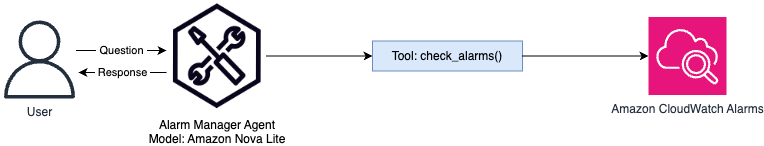

In [10]:
from IPython.display import Image
Image(filename='images/cloudwatch.png')

The simplest way to define custom tools is as a Python function with the **@tool** decorator.

13. To create a custom AWS account health tool, run the following cell:

In [11]:
from strands import tool

# Define any Python function as a tool with the @tool decorator
@tool
# Returns a string for interpretability by the agent
def alarms(alarm_name: str) -> str:
    try:
        # Two sessions to check alarms in multiple regions
        cloudwatch_use1 = use1_session.client("cloudwatch")
        cloudwatch_usw2 = usw2_session.client("cloudwatch")

        MetricAlarms = cloudwatch_use1.describe_alarms(StateValue="ALARM")["MetricAlarms"] + cloudwatch_usw2.describe_alarms(StateValue="ALARM")["MetricAlarms"]

        if not MetricAlarms:
            return "No alarms are currently in ALARM state"

        alarm_count = len(MetricAlarms)
        alarm_names = [alarm["AlarmName"] for alarm in MetricAlarms]

        # Return a descriptive string for the agent to leverage
        return f"{alarm_count} alarm{'s' if alarm_count > 1 else ''} in ALARM state: {', '.join(alarm_names)}"

    except:
        return "An error occurred checking alarm with boto3"

14. To create an agent that uses the new tool, run the following cell:

In [12]:
alarm_manager_agent = Agent(
    model=nova_lite,
    system_prompt="You are a helpful assistant that notifies when CloudWatch alarms are in alarm.",
    tools=[alarms],
    callback_handler=None
)

15. To invoke the CloudWatch alarms agent, run the following cell:

In [13]:
print(alarm_manager_agent("Are any alarms in my account IN ALARM?"))

<thinking>The tool result indicates that no alarms are currently in the ALARM state.</thinking>


There are no alarms in your account that are currently in the ALARM state.



<div style="background-color: rgba(231, 243, 237, 0.3); border: 1px solid #43A047; border-radius: 6px; padding: 15px; margin: 10px 0; color: #2E7D32; font-family: monospace; max-width: 100%; word-wrap: break-word; box-sizing: border-box;">
<strong>Example Output</strong>
<br><br>
There is currently 1 alarm in the ALARM state: "Client-System-Down".
</div>

There is an alarm indicating an issue with a client system in an AnyCompany AWS account.

### Task 1.5: Add web search capabilities to an agent

Use a Python library in a custom Python tool to let your agent browse the web.

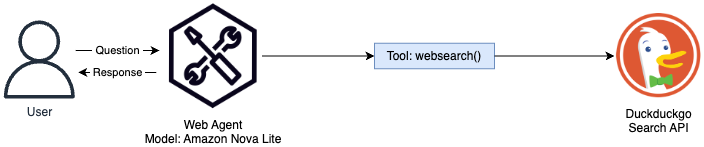

In [14]:
from IPython.display import Image
Image(filename='images/web agent.png')

The DuckDuckGo Search (DDGS) library makes allow you to use a search engine in Python code. It is one solution to circumventing LLM training cutoffs and getting an alternative source for information.

16. To create a custom tool for performing web searches, run the following cell:

In [16]:
from ddgs import DDGS
from ddgs.exceptions import RatelimitException, DDGSException
import logging

# Configure logging
logging.getLogger("strands").setLevel(logging.INFO)

# Define a websearch tool
@tool
def websearch(keywords: str, region: str = "us-en", max_results: int | None = None) -> str:
    """Search the web to get updated information.
    Args:
        keywords (str): The search query keywords.
        region (str): The search region: wt-wt, us-en, uk-en, ru-ru, etc..
        max_results (int | None): The maximum number of results to return.
    Returns:
        List of dictionaries with search results.
    """
    try:
        results = DDGS().text(keywords, region=region, max_results=max_results)
        return results if results else "No results found."
    except RatelimitException:
        return "RatelimitException: Please try again after a short delay."
    except DDGSException as d:
        return f"DuckDuckGoSearchException: {d}"
    except Exception as e:
        return f"Exception: {e}"

17. To create a researcher agent, run the following cell:

In [ ]:
# Create a recipe assistant agent
researcher_agent = Agent(
    model=nova_lite, 
    system_prompt="""You are a technology research assistant.
    Use the websearch tool to find up to date information, announcments, and documentation""",
    # Import the websearch tool created above
    tools=[websearch],
)

**Note:** With Strands Agents, it's important to tell the agent when and how to use tools to get predictable agent responses.

18. To find out about the newest innovations in generative AI, run the following cell:

In [ ]:
print(researcher_agent("What are the newest GenAI innovations in 2025?"))

<div style="background-color: rgba(231, 243, 237, 0.3); border: 1px solid #43A047; border-radius: 6px; padding: 15px; margin: 10px 0; color: #2E7D32; font-family: monospace; max-width: 100%; word-wrap: break-word; box-sizing: border-box;">
<strong>Example Output</strong>
<br><br>
Tool #2: websearch
<thinking>Based on the search results, here are some of the newest GenAI innovations in 2025:</thinking>

- **Self-Supervised Learning:** Innovations like self-supervised learning, which reduces the need for large amounts of labeled training data, provide solutions to practical problems in the GenAI space.
- **New Use Cases:** In 2025, several new use cases will emerge for GenAI, beyond chatbots and image generators.

...
</div>

**Note:** Before proceeding, make sure **project/flight.csv** exists and is correctly formatted or future lab steps may not work correctly.

19. Return to the lab instructions and continue with the **Task 2** section.